In [133]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.electronic_structure.plotter import BSPlotter
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSDOSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
import matplotlib.pyplot as plt

In [134]:
with MPRester("iLIbKv6XbyJaj3FOZJZ6") as m:

    # Structure for material id
    bandStruct = m.get_bandstructure_by_material_id("mp-165")
    struct = m.get_structure_by_material_id("mp-165")
    
# Visualization
view = quick_view(struct)
display(view)

JsmolView(layout=Layout(align_self='stretch', height='400px'))

In [135]:
print("Détermination de la bande interdite :")

bandGap = bandStruct.get_band_gap()
if bandGap['direct'] == True :
    bandType = "directe"
else:
    bandType = "indirecte"
    
bandPlot = BSPlotter(bandStruct)
if data['is_metal'] == True :
    elemType = "metal"
else:
    elemType = "isolant"
    
print("Bande interdite", bandType, "de", bandGap['energy'], "eV (", elemType, ") pour un vecteur d'onde k évoluant dans la direction ", bandGap['transition'], "de la zone de Brillouin du cristal")

Détermination de la bande interdite :
Bande interdite indirecte de 0.45250000000000057 eV ( isolant ) pour un vecteur d'onde k évoluant dans la direction  \Gamma-M de la zone de Brillouin du cristal


Nous sommes ici en présence de deux bandes de valence (7 et 8), mais pour cet exercice, j'utiliserai la septième. 

[1.50374343 3.40576504 3.00516265 1.84166843 1.55915065 0.76535492
 0.96758663 1.94743924 2.64974123]
Direction dans laquelle la dernière bande de valence présente le plus de dispersion : M-K (flèche rouge)
Valeur maximale : 3.405765035016158
Direction dans laquelle la dernière bande de valence présente le moins de dispersion : L-H (flèche verte)
Valeur maximale : 0.7653549171806867


Direction dans laquelle la première bande de conduction présente le plus de dispersion : gamma-A (flèche bleue)
Valeur maximale : 1.568528474552328
Direction dans laquelle la première bande de conduction présente le moins de dispersion : A|L-M|K (flèche jaune)
Valeur maximale : 0.09367003371887626


Structures des bandes électroniques du Si :


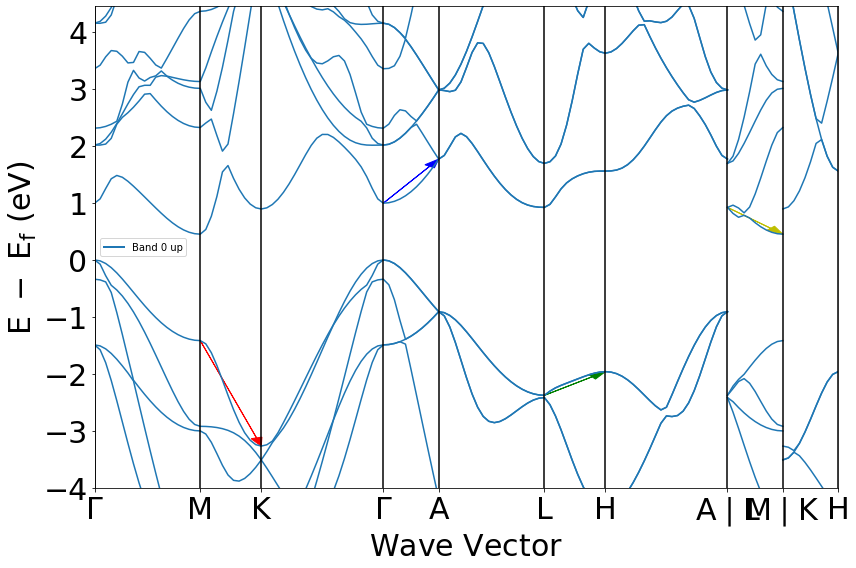

In [139]:
plot = bandPlot.get_plot()
energy = data.get('energy')
distance = data.get('ticks').get('distance')
vbm = bandStruct.get_vbm()
cbm = bandStruct.get_cbm()

# print(vbm['band_index']) -> defaultdict(<class 'list'>, {<Spin.up: 1>: [6, 7]})
# print(cbm['band_index']) -> defaultdict(<class 'list'>, {<Spin.up: 1>: [8]})
print("Nous sommes ici en présence de deux bandes de valence (7 et 8), mais pour cet exercice, j'utiliserai la septième. \n")

indexV = 7
indexC = 8

new_dist = []
for d in distance:
    if d not in new_dist:
        new_dist.append(d)

slopeV = np.zeros(9)
slopeC = np.zeros(9)
for i in range(0,9):
    delta_dist = new_dist[i+1]-new_dist[i]
    slopeV[i] = abs(((energy.get('1')[i][indexV])[-1] - (energy.get('1')[i][indexV])[0])/(delta_dist))
    slopeC[i] = abs(((energy.get('1')[i][indexC])[-1] - (energy.get('1')[i][indexC])[0])/(delta_dist))

maxV = np.amax(slopeV)
minV = np.amin(slopeV)

#print(slopeV) -> [1.50374343 3.40576504 3.00516265 1.84166843 1.55915065 0.76535492 0.96758663 1.94743924 2.64974123]
# on constate que l'index du max est 1 et celui du min est 5

print("Direction dans laquelle la dernière bande de valence présente le plus de dispersion : M-K (flèche rouge)")
print("Valeur maximale :", maxV)
print("Direction dans laquelle la dernière bande de valence présente le moins de dispersion : L-H (flèche verte)")
print("Valeur maximale :", minV)

print("\n")

maxC = np.amax(slopeC)
minC = np.amin(slopeC)

# print(slopeC) -> [0.57763618 0.81315513 0.09367003 1.56852847 0.8999958  1.1720244 0.19340702 0.95315307 1.34867918]
# on constate que l'index du max est 3 et celui du min est 7

print("Direction dans laquelle la première bande de conduction présente le plus de dispersion : gamma-A (flèche bleue)")
print("Valeur maximale :", maxC)
print("Direction dans laquelle la première bande de conduction présente le moins de dispersion : A|L-M|K (flèche jaune)")
print("Valeur maximale :", minC)

print("\n")

print("Structures des bandes électroniques du Si :")
plt.arrow(new_dist[1], energy.get('1')[1][indexV][0], new_dist[2] - new_dist[1], energy.get('1')[1][indexV][-1] - energy.get('1')[1][indexV][0], head_width=0.1, color='r', length_includes_head=True)
plt.arrow(new_dist[5], energy.get('1')[5][indexV][0], new_dist[6] - new_dist[5], energy.get('1')[5][indexV][-1] - energy.get('1')[5][indexV][0], head_width=0.1, color='g', length_includes_head=True)
plt.arrow(new_dist[3], energy.get('1')[3][indexC][0], new_dist[4] - new_dist[3], energy.get('1')[3][indexC][-1] - energy.get('1')[3][indexC][0], head_width=0.1, color='b', length_includes_head=True)
plt.arrow(new_dist[7], energy.get('1')[7][indexC][0], new_dist[8] - new_dist[7], energy.get('1')[7][indexC][-1] - energy.get('1')[7][indexC][0], head_width=0.1, color='y', length_includes_head=True)
plt.show()

In [128]:
print("Expression mathématique de la masse effective :")

Expression mathématique de la masse effective :


$$m^{*} = \hbar^2   \left   (\frac{\partial^2E(k)}{\partial k^2}   \right   )   ^{-1}$$

In [129]:
print("Expression mathématique de E sous l'hypothèse d'une dispersion parabolique :")

Expression mathématique de E sous l'hypothèse d'une dispersion parabolique :


$$ E(k) = ak^2 + bk + c $$

In [130]:
print("Il faut donc déterminer les constantes a, b et c.")

Il faut donc déterminer les constantes a, b et c.


In [131]:
A = 10**-10 # [m]
hbar = 1.054571817*(10**-34) # [J.s]
eV = 1.602176634*(10**-19) # [J]

dist = data.get('distances')


import warnings
warnings.simplefilter('ignore', np.RankWarning)

In [132]:
print("Masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique :")

xV = [distances[2][-2], distances[2][-1], distances[3][0]]
yV = [energy.get('1')[2][indexV][-2], energy.get('1')[2][indexV][-1], energy.get('1')[3][indexV][0]]
abcV = np.polyfit(xV,yV,2)

aV = abcV[0]

mV = hbar**2 * 1/(2*aV) * eV * A**2

print(mV, "[kg]")
print("avec a = ", abcV[0], "b = ", abcV[1], "et c =", abcV[2])

print("\n")

print("Masse effective à la base de la première bande de conduction en supposant une dispersion parabolique :")

xC = [distances[0][-2], distances[0][-1], distances[1][0]]
yC = [energy.get('1')[0][indexC][-2], energy.get('1')[0][indexC][-1], energy.get('1')[1][indexC][0]]
abcC = np.polyfit(xC,yC,2)

aC = abcC[0]

mC = hbar**2 * 1/(2*aC) * eV * A**2

print(mC, "[kg]")
print("avec a = ", abcC[0], "b = ", abcC[1], "et c =", abcC[2])

Masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique :
1.3936859782610705e-106 [kg]
avec a =  0.06392456612436168 b =  -0.0003179851846428035 et c = -0.42268174416379367


Masse effective à la base de la première bande de conduction en supposant une dispersion parabolique :
-4.9077065762021236e-107 [kg]
avec a =  -0.18153239214820632 b =  0.1616249594854696 et c = 0.4613554350923426
